ref: <https://towardsdatascience.com/fourier-transform-the-practical-python-implementation-acdd32f1b96a>

## Introduction

Fourier Transform (FT) relates the time domain of a signal to its frequency domain, where the frequency domain contains the information about the sinusoids (amplitude, frequency, phase) that construct the signal. Since FT is a continuous transform, the Discrete Fourier Transform (DFT) becomes the applicable transform in the digital world that holds the information of signals in the discrete format as a set of samples, where the sampling theorem is the strict rule of discretizing and the signal. The DFT of a signal (xn) with N number of samples is given by the following equation [2]:

$X_k = \sum_{n=0}^{N-1} x_n \cdot e^{i2\pi kn/N}=\sum_{n=0}^{N-1}\cdot [\cos(2\pi k/N) - i\sin(2\pi kn/N)]$

- $N$ : Number of Samples
- $n$: Current Sample
- $k$: Current frequency where $k\in [0,N-1]$
- $xn$: The sine value at sample $n$
- $Xk$: The DFT which includes information on both amplitude and phase

The output of the DFT (Xk) is an array of complex numbers that hold the information of frequency components [2]. Applying DFT on signals using the mathematical equation directly demands a heavy computation complexity. Luckily, a Fast Fourier Transform (FFT) was developed [3] to provide a faster implementation of the DFT. The FFT takes advantage of the symmetry nature of the output of the DFT. We will not further discuss how FFT works as it’s like the standard practical application of DFT. But if you want more details, refer to [3].

## Let's get started

In [1]:
# Import the required packages
import numpy as np
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline

The signal we will generate using the previous class contains three sinusoids (1, 10, 20) Hz with amplitudes of (3, 1, 0.5), respectively. The sampling rate will be 200 and the duration of the signal is 2 seconds.

In [15]:
# Import the required package
import numpy as np

# Building a class Signal for better use.
class Signal:
    def __init__(self, amplitude=1, frequency=10, duration=1, sampling_rate=100.0, phase=0):
        self.amplitude = amplitude
        self.frequency = frequency
        self.duration = duration
        self.sampling_rate = sampling_rate
        self.phase = phase
        self.time_step = 1.0/self.sampling_rate
        self.time_axis = np.arange(0, self.duration, self.time_step)
  
  # Generate sine wave
    def sine(self):
        return self.amplitude*np.sin(2*np.pi*self.frequency*self.time_axis+self.phase)
  
  # Generate cosine wave
    def cosine(self):
        return self.amplitude*np.cos(2*np.pi*self.frequency*self.time_axis+self.phase)

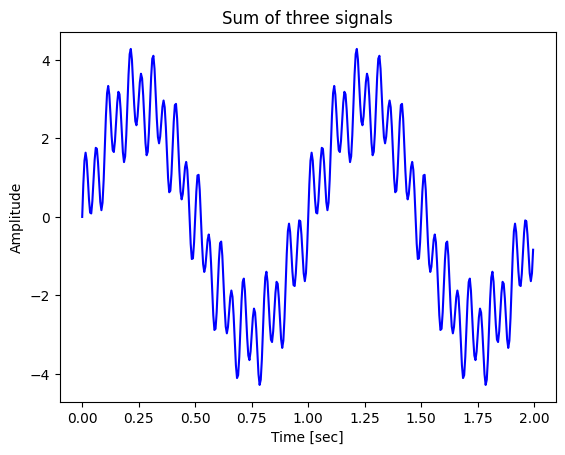

In [16]:
# Generate the three signals using Signal class and its method sine()
signal_1hz = Signal(amplitude=3, frequency=1, sampling_rate=200, duration=2)
sine_1hz = signal_1hz.sine()
signal_20hz = Signal(amplitude=1, frequency=20, sampling_rate=200, duration=2)
sine_20hz = signal_20hz.sine()
signal_10hz = Signal(amplitude=0.5, frequency=10, sampling_rate=200, duration=2)
sine_10hz = signal_10hz.sine()

# Sum the three signals to output the signal we want to analyze
signal = sine_1hz + sine_20hz + sine_10hz

# Plot the signal
plt.plot(signal_1hz.time_axis, signal, 'b')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.title('Sum of three signals')
plt.show()

The Fourier Transform of this signal can be calculated using (fft) from the scipy package as follows [4]:

## FFT

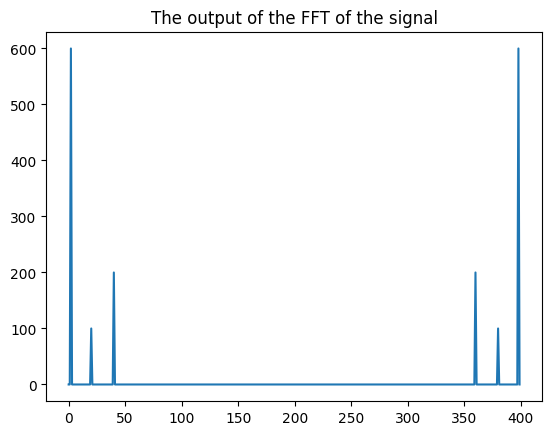

In [18]:
# Apply the FFT on the signal
fourier = fft(signal)

# Plot the result (the spectrum |Xk|)
plt.plot(np.abs(fourier))
plt.title('The output of the FFT of the signal')
plt.show()

The figure above should represent the frequency spectrum of the signal. Notice that the x-axis is the number of samples (instead of the frequency components) and the y-axis should represent the amplitudes of the sinusoids. To get the actual amplitudes of the spectrum, we have to normalize the output of (fft) by N/2 the number of samples.

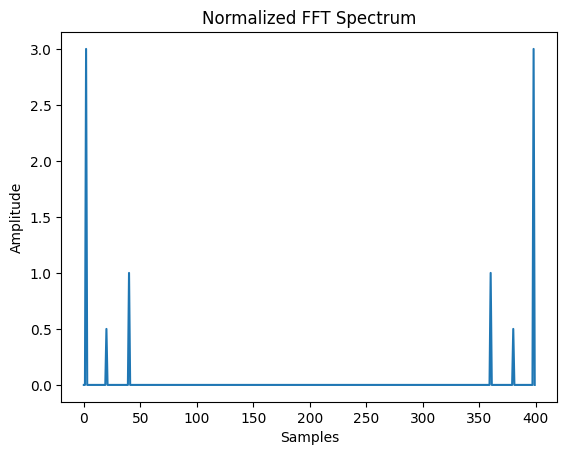

In [22]:
# Calculate N/2 to normalize the FFT output
N = len(signal)
normalize = N/2

# Plot the normalized FFT (|Xk|)/(N/2)
plt.plot(np.abs(fourier)/normalize)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.title('Normalized FFT Spectrum')
plt.show()

To get the frequency components (x-axis), you can use (fftfreq) from the scipy package. This method needs the number of samples (N) and the sampling rate as input arguments. And it returns a frequency axis with N frequency components [5].

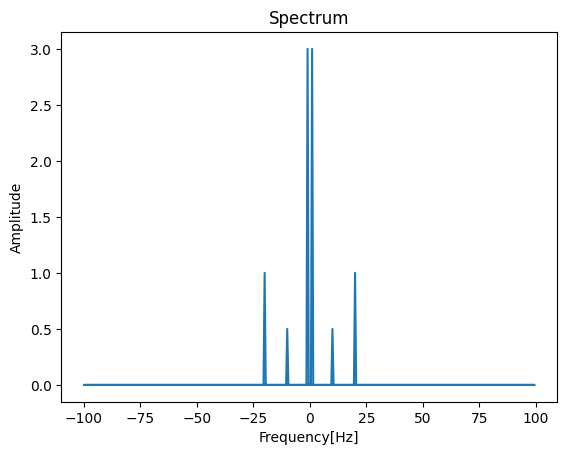

In [21]:
# Get the frequency components of the spectrum
sampling_rate = 200.0 # It's used as a sample spacing
frequency_axis = fftfreq(N, d=1.0/sampling_rate)
norm_amplitude = np.abs(fourier)/normalize
# Plot the results
plt.plot(frequency_axis, norm_amplitude)
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.title('Spectrum')
plt.show()

The spectrum with the actual amplitudes and frequency axis

To understand what happened in the last code, let’s plot only the frequency axis:

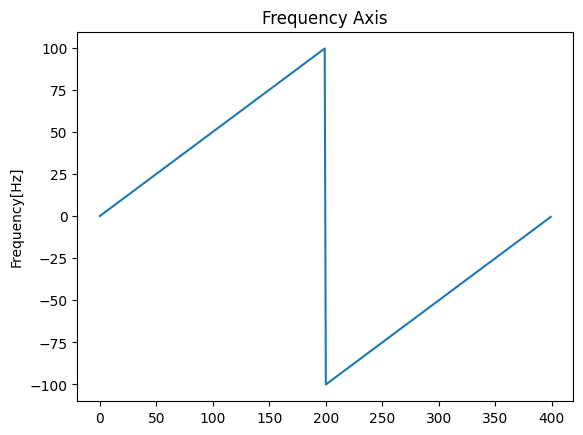

In [24]:
# Plot the frequency axis for more explanation
plt.plot(frequency_axis)
plt.ylabel('Frequency[Hz]')
plt.title('Frequency Axis')
plt.show()

Notice that the frequency array starts at zero. Then, it begins to increase with (d) step by step to reach its maximum (100Hz). After that, it starts from the negative maximum frequency (-100Hz) to increase back again with (d) step by step. The maximum frequency that can hold information from the signal (100Hz) is half of the sampling rate and this is true according to the Sampling Theorem [2].

Due to the symmetry of the spectrum for the real-value signals, we only focus on the first half of the spectrum [2]. The `Scipy package` provides methods to deal with the Fourier transform of the real-value signals, where it takes advantage symmetry nature of the spectrum. Such methods are (rfft [6], rfftfreq [7]). These methods are the same as (fft, fftfreq), respectively. By comparing the time execution between (fft) and (rfft) methods on the same signal, you’ll find that (rfft) is a little bit faster. When dealing with real-value signals, which is most likely the case, using (rfft) is the best choice.

In [25]:
# Calculate the time execution of (fft)
print('Execution time of fft function:')
%timeit fft(signal)
# Calculate the time execution of (rfft)
print('\nExecution time of rfft function:')
%timeit rfft(signal)

Execution time of fft function:
4.08 µs ± 11.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Execution time of rfft function:
4 µs ± 5.39 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


To conclude our discussion about scaling the amplitudes and generating the frequency axis of the spectrum for real-values signal data that have a symmetry nature in their frequency domain, the code below represents the final form of the spectrum (the actual amplitudes on the right frequencies).

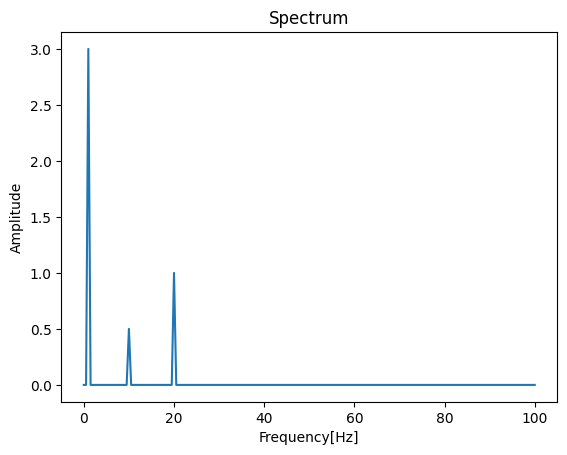

In [26]:
# Plot the actual spectrum of the signal
plt.plot(rfftfreq(N, d=1/sampling_rate), 2*np.abs(rfft(signal))/N)
plt.title('Spectrum')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.show()